# Analysis of the Curry data

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
import json

The first code cell most likely imports necessary libraries like pandas and matplotlib, and loads the JSON file containing Curry's shot data.

In [2]:
with open('shots.json') as jsonData:
    shots = json.load(jsonData)
columnHeaders = [x.lower() for x in shots['resultSets'][0]['headers']]
rows = shots['resultSets'][0]['rowSet']
shots = pd.DataFrame(data=rows, columns=columnHeaders)

The JSON data is converted into a DataFrame for easy manipulation. Exploratory commands like .head() is used to understand the dataset.

In [3]:
# display the first five rows
shots.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,0020900015,4,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,25,...,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028,GSW,HOU
1,Shot Chart Detail,0020900015,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,31,...,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028,GSW,HOU
2,Shot Chart Detail,0020900015,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,2,...,Center(C),8-16 ft.,14,-60,129,1,0,20091028,GSW,HOU
3,Shot Chart Detail,0020900015,141,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,49,...,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028,GSW,HOU
4,Shot Chart Detail,0020900015,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,19,...,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028,GSW,HOU


## Clean the data

In this step, I cleaned the dataset by dropping unnecessary columns, such as player_id, team_name, game_event_id, and time-related columns. These columns were not useful for analyzing Stephen Curry's shooting patterns. Removing them allowed me to focus on the key features essential for understanding Curry's shot performance.

In [4]:
shots = shots.drop(columns=['grid_type','game_event_id','player_id','player_name',
                            'team_id','team_name','minutes_remaining','seconds_remaining',
                            'htm','vtm'])

The shots.head() command is used to display the first five rows of the dataset. This helps us quickly examine the structure of the data, I gain a better understanding of the information available, which is essential for conducting a detailed analysis of Stephen Curry's shooting performance.

In [5]:
# display the first five rows
shots.head()

,game_id,period,event_type,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date
0,0020900015,1,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028
1,0020900015,1,Made Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028
2,0020900015,1,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,1,0,20091028
3,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028
4,0020900015,2,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028


In [6]:
# display the values counts for the period column
shots['period'].value_counts()

period
3    3541
1    3501
2    2502
4    2209
5      90
6       3
Name: count, dtype: int64

Then, I used shots['period'].value_counts() to see how many shot attempts were made in each period of the game. The output shows the number of shots taken during different periods, with the third quarter having the most (3,541 shots), followed by the first quarter (3,501). The later periods, such as overtime (periods 5 and 6), have significantly fewer shots. This helps understand the frequency of Curry's shot attempts at different stages of the game.

In [7]:
# drop the rows with a period of 5 or 6
shots = shots[~shots['period'].isin([5, 6])]

Next, I filtered out the rows that correspond to the 5th and 6th periods, which represent overtime. Since there were only a few shot attempts during these periods, I decided to remove them to keep the focus on the primary quarters of the game, which makes the analysis more consistent and representative of regular game play.

## Prepare and analyze the data

In [8]:
# display the number of unique values for the action_type column
shots['action_type'].nunique()

51

To better understand the variety of shot actions, I counted the unique values in the action_type column and found 51 distinct types. This indicates that Stephen Curry uses a diverse range of actions, such as jump shots, layups, and dunks. Recognizing this variety helps in analyzing his shooting performance more thoroughly.

In [9]:
# display the value counts for the action_type column
shots['action_type'].value_counts()

action_type
Jump Shot                             5802
Pullup Jump shot                      1694
Step Back Jump shot                    755
Driving Layup Shot                     635
Layup Shot                             537
Floating Jump shot                     387
Driving Finger Roll Layup Shot         324
Running Jump Shot                      209
Driving Reverse Layup Shot             165
Running Layup Shot                     131
Cutting Layup Shot                     119
Jump Bank Shot                         108
Reverse Layup Shot                     102
Fadeaway Jump Shot                      90
Turnaround Jump Shot                    89
Driving Floating Jump Shot              83
Running Bank shot                       61
Running Finger Roll Layup Shot          51
Running Pull-Up Jump Shot               44
Finger Roll Layup Shot                  36
Driving Bank shot                       36
Driving Floating Bank Jump Shot         34
Running Reverse Layup Shot              33

To understand the distribution of different shot actions, I used value_counts() on the action_type column. This gave me a count of how many times each type of shot action, such as jump shots or layups, occurred in the dataset. This breakdown is useful for identifying the most common types of shots Stephen Curry takes, which can help focus further analysis on his shooting habits and performance patterns.

In [10]:
# STEPS:
# pick common substring from the value counts
# add common substrings to list
# query the shots for the actions until empty

commonSubstrings = ['Jump', 'Layup', 'Dunk', 'Hook', 'Bank']

# get a list of action_type values that contain the words from the commonSubstrings
# actions = shots[shots.action_type.str.contains('|'.join(commonSubstrings))].action_type.to_list()
# shots.query('action_type not in @actions').action_type


# Get a list of action_type values that contain any of the words in commonSubstrings
actions = shots[shots.action_type.str.contains('|'.join(commonSubstrings))].action_type.unique().tolist()

# Check the remaining action_type values that do not contain any of the substrings
remaining_actions = shots[~shots['action_type'].isin(actions)].action_type.unique()
remaining_actions  # Display remaining action types to identify other common keywords


array(['Tip Shot', 'Turnaround Fadeaway shot'], dtype=object)

To better categorize the different types of shot actions, I identified common substrings such as "Jump," "Layup," "Dunk," "Hook," and "Bank" that were likely to be part of various shot descriptions. I then used these keywords to filter out and group the action types that contain any of these substrings. This way, I was able to extract the most common shot types and create a list of them.

Afterward, I checked for any remaining action types that did not contain these common keywords, and I found a few specific actions like "Tip Shot" and "Turnaround Fadeaway shot." This helped me identify and potentially create further categories or analyze these less common actions separately.

In [11]:
# define the getLabel() function here
def get_label(row):
    for substring in commonSubstrings:
        if substring in row['action_type']:
            return substring
    return 'Other'


Here, I defined a function called get_label() to classify the action_type values based on common keywords. The function takes each row as input and checks if the action_type contains any of the common substrings I previously identified, such as "Jump," "Layup," or "Dunk." If a match is found, the function returns that substring as the label for the action. If none of the substrings are present, it labels the action as "Other." This function helps in categorizing the shot actions into broader, more manageable categories, simplifying further analysis of shooting patterns.

In [12]:
# apply the getLabel() function and assign the results to a column named shot_type
shots['shot_type'] = shots.apply(get_label, axis=1)

I applied the get_label() function to each row in the shots DataFrame to categorize the action type and assigned the result to a new or updated column named shot_type. By using apply() with axis=1, the function was applied row-wise to ensure each shot's action type was labeled accordingly. This way, the shot_type column now contains simplified categories like "Jump," "Layup," or "Other," making it easier to analyze the distribution of different shot types in Curry’s shooting data.

In [13]:
shots[['action_type', 'shot_type']].head()

,action_type,shot_type
0,Jump Shot,Jump
1,Step Back Jump shot,Jump
2,Jump Shot,Jump
3,Jump Shot,Jump
4,Jump Shot,Jump


I displayed the first few rows of the shots DataFrame to check how the new shot_type column compares to the original action_type. The output shows that different variations of shot actions, like "Jump Shot" and "Step Back Jump shot," have been categorized under the common label "Jump." This confirms that the get_label() function worked as intended, grouping similar shot actions into broader categories, making it easier to analyze Curry’s shooting tendencies.

## Plot the data

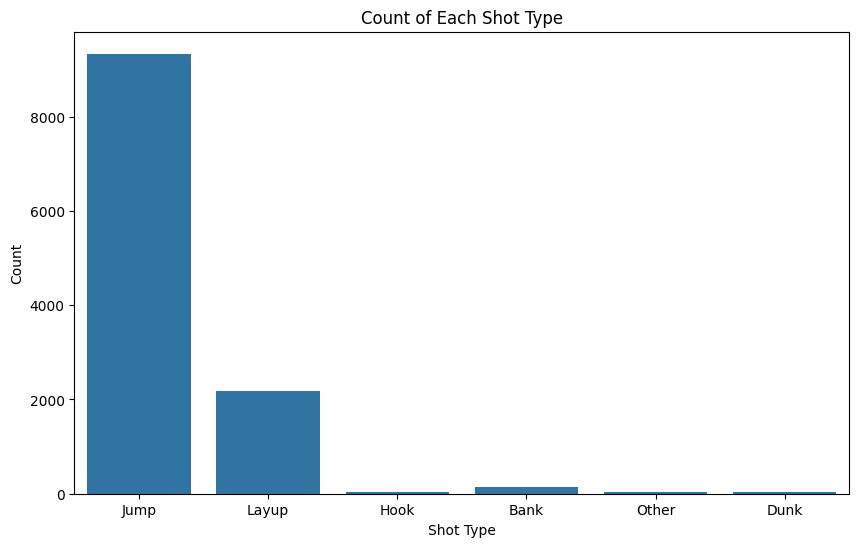

In [14]:
# create a count plot to show each type of shot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for each shot type
plt.figure(figsize=(10, 6))
sns.countplot(data=shots, x='shot_type')
plt.title("Count of Each Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.show()

To visualize the frequency of different shot types, I created a count plot using Seaborn. This plot shows how often each categorized shot type, such as "Jump," "Layup," "Hook," etc., occurs in the dataset. The result reveals that "Jump" shots are by far the most frequent, followed by "Layup." Other shot types like "Hook," "Bank," and "Dunk" are much less common. This distribution highlights Stephen Curry's preference for jump shots, which aligns with his well-known shooting style.

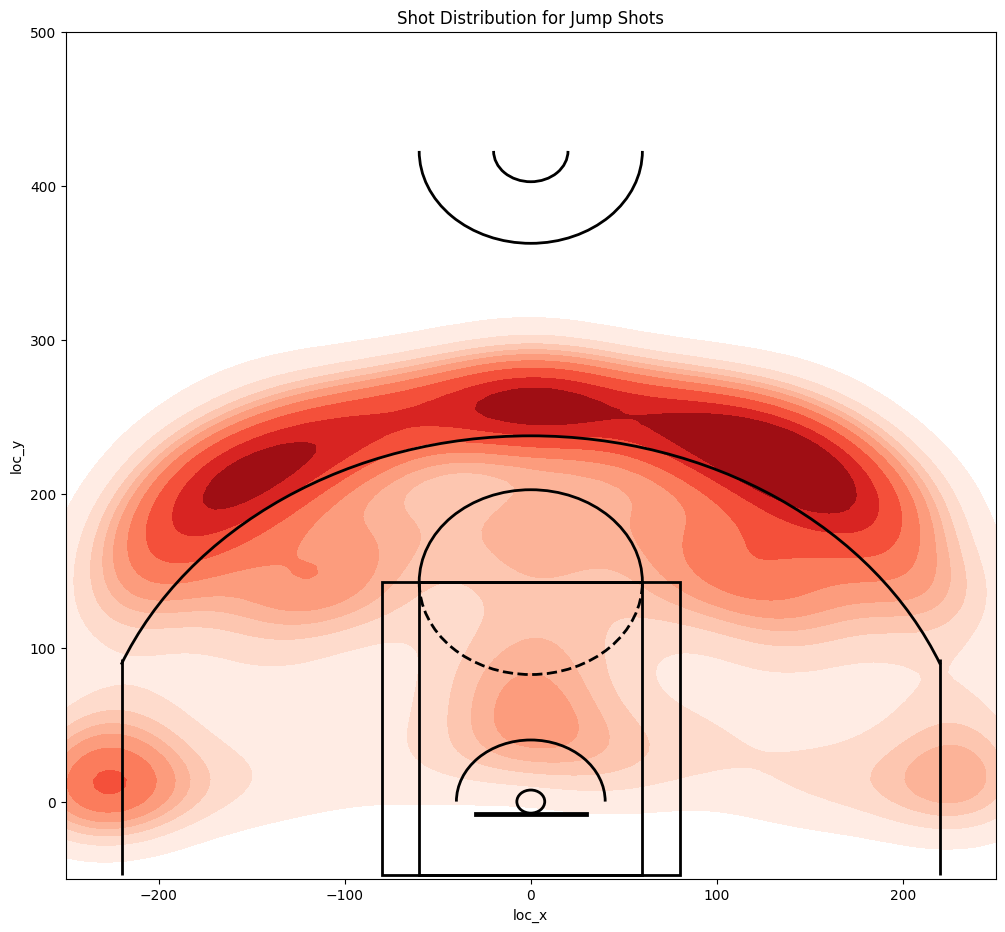

In [15]:
# SOURCE: http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.pyplot as plt
import seaborn as sns

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Free throw top and bottom arcs
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

    # Restricted Zone arc
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

    # Three-point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    # List of court elements to be added
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                      restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    if outer_lines:
        # Draw the half-court line, baseline, and side out of bounds lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    # Add court elements to the plot
    for element in court_elements:
        ax.add_patch(element)

    return ax


# Plot the KDE of shot distribution for different shot types on the court
fig, ax = plt.subplots(figsize=(12, 11))

# KDE plot for a specific shot type
sns.kdeplot(
    data=shots[shots['shot_type'] == 'Jump'],
    x='loc_x', y='loc_y',
    fill=True, cmap="Reds",
    ax=ax, thresh=0.05
)

# Draw the basketball court on the existing plot
draw_court(ax=ax)

# Set limits to match court dimensions
ax.set_xlim(-250, 250)
ax.set_ylim(-50, 500)

# Set plot title and display
plt.title("Shot Distribution for Jump Shots")
plt.show()


To better understand Stephen Curry's shot distribution, I plotted the shot density for "Jump" shots on a basketball court. I started by defining a function, draw_court(), to draw a representation of the basketball court using various patches like circles, rectangles, and arcs to capture elements like the hoop, three-point line, and paint areas.

Then, I created a kernel density estimate (KDE) plot using Seaborn to show where Curry tends to take jump shots. This plot uses loc_x and loc_y coordinates to visualize the density of shots across the court. Darker areas represent zones with a higher density of shots, indicating where Curry prefers to shoot from. The result shows that Curry takes many of his jump shots from the three-point line, with hot spots visible around the arc and near the corners, highlighting his proficiency from long range.

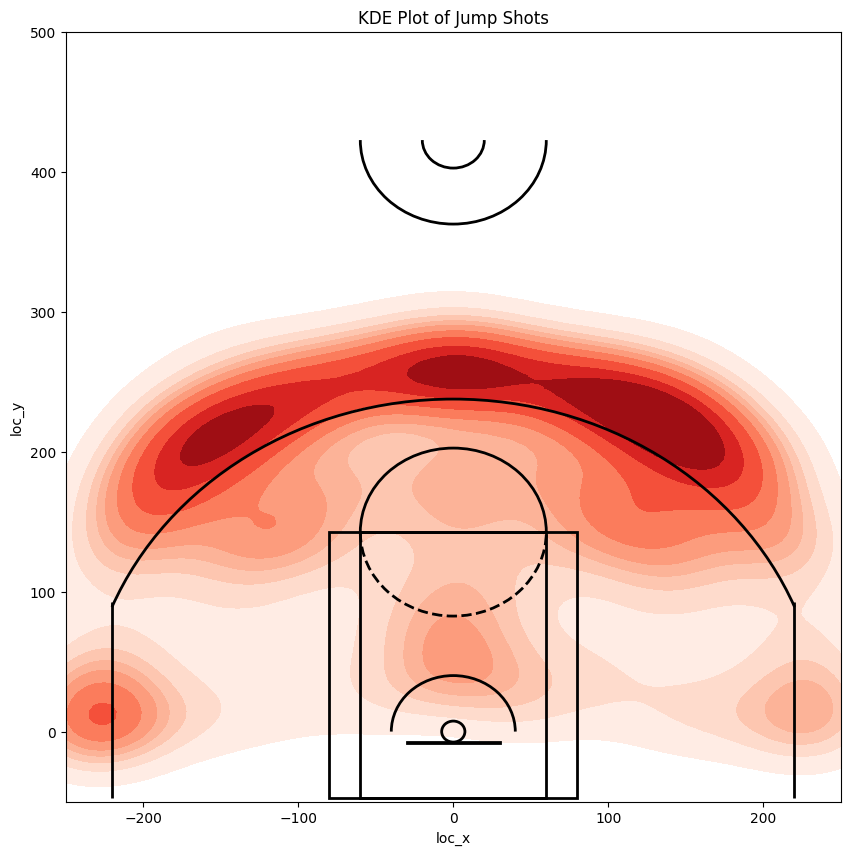

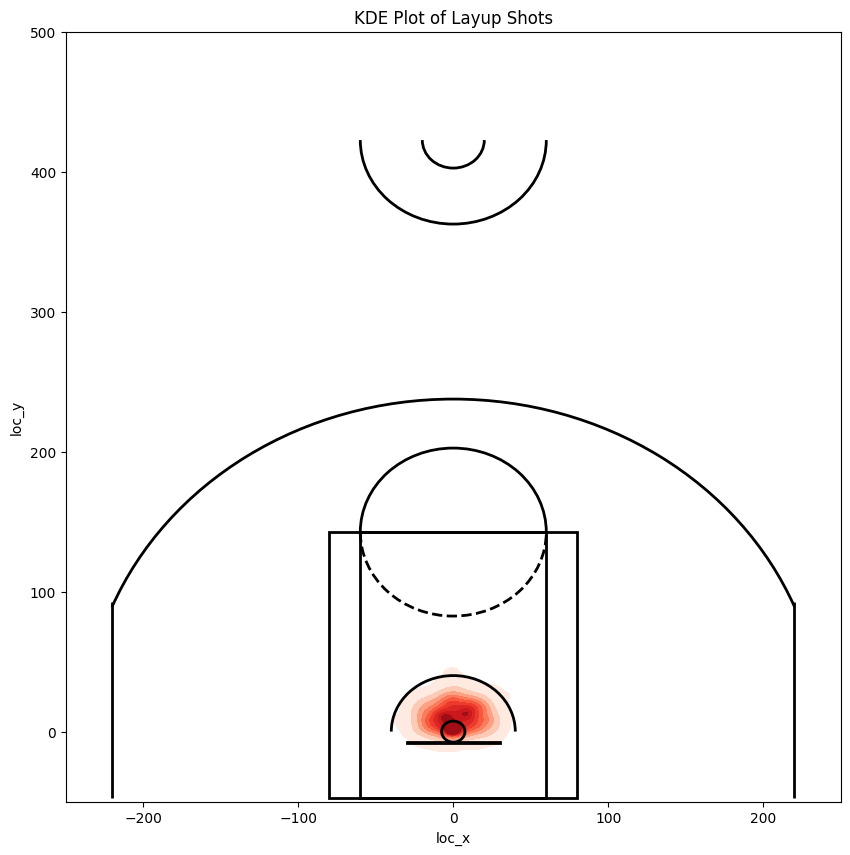

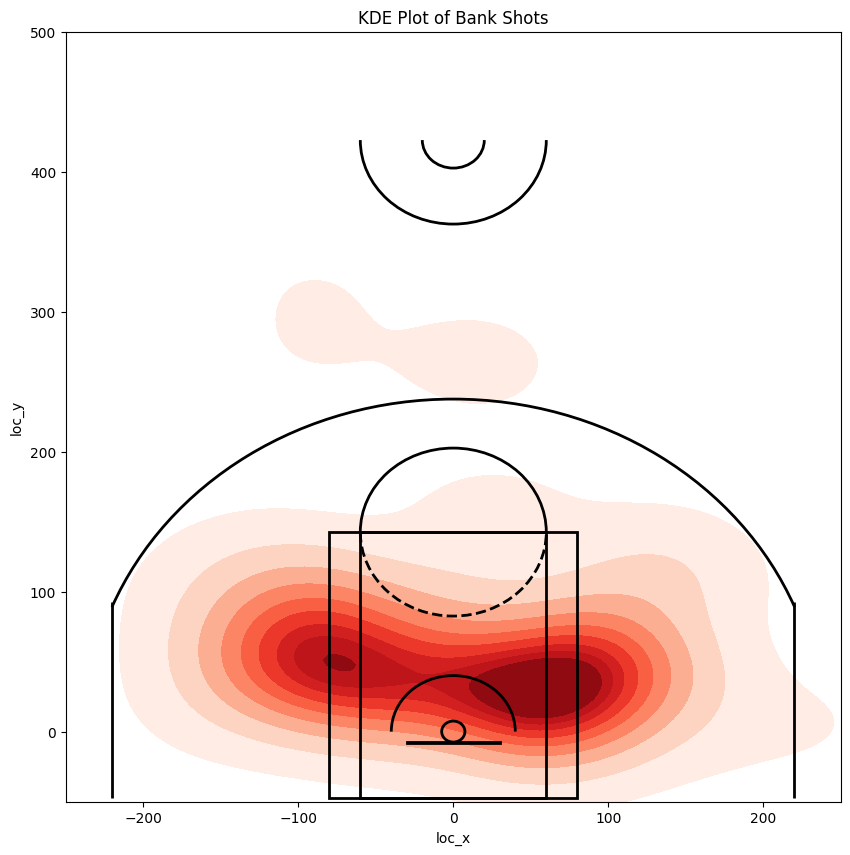

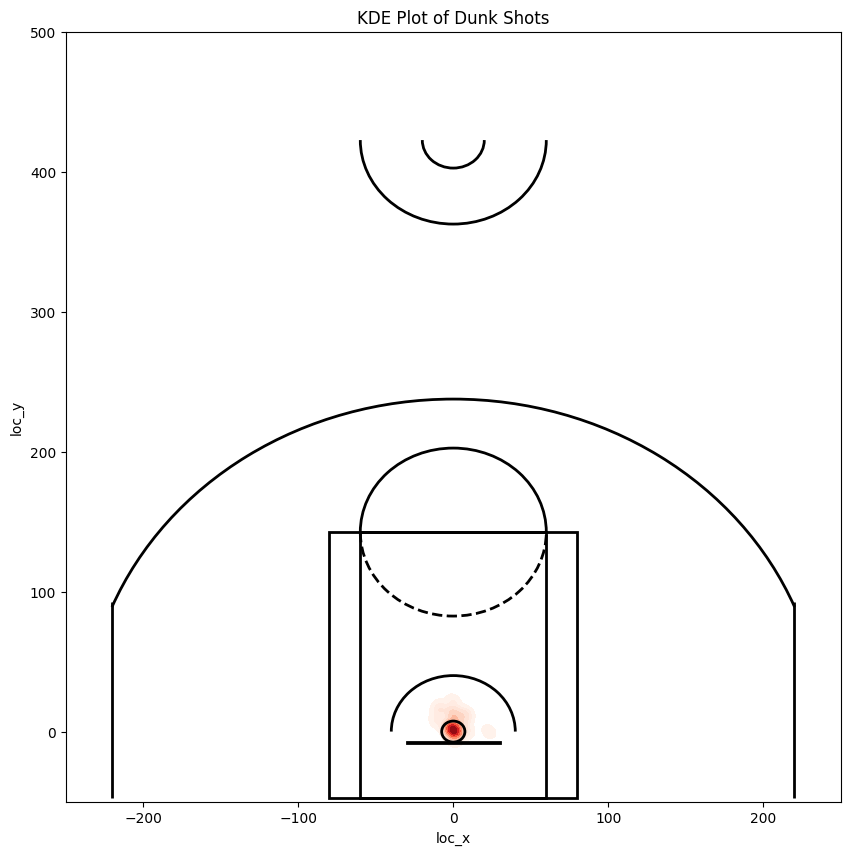

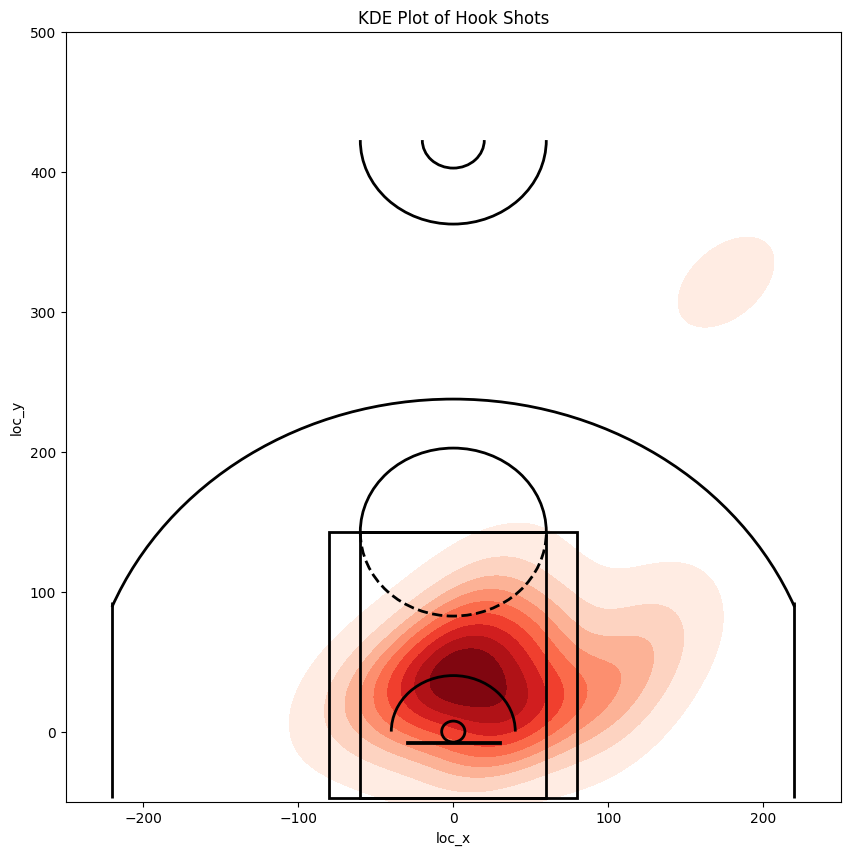

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define shot types to display (e.g., Jump, Layup, Bank, Dunk, Hook)
shot_types = ["Jump", "Layup", "Bank", "Dunk", "Hook"]

# Loop through each shot type to create and display individual KDE plots
for shot_type in shot_types:
    # Create a new figure for each shot type
    fig, ax = plt.subplots(figsize=(10, 10))

    # Filter data for the current shot type
    shot_data = shots[shots['shot_type'] == shot_type]

    # KDE plot for shot location, using loc_x and loc_y coordinates
    sns.kdeplot(
        data=shot_data,
        x="loc_x",
        y="loc_y",
        fill=True,
        cmap="Reds",
        ax=ax,
        thresh=0.05
    )

    # Draw the basketball court on the current plot
    draw_court(ax=ax)

    # Set title and limits for the plot
    ax.set_title(f"KDE Plot of {shot_type} Shots")
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 500)

    # Display the plot
    plt.show()


To further explore Stephen Curry's shooting tendencies, I created separate KDE (kernel density estimate) plots for each shot type, including "Jump," "Layup," "Bank," "Dunk," and "Hook." The KDE plots were generated individually for each shot type to visualize where Curry prefers to take different kinds of shots.

- Jump Shots: The KDE plot for jump shots shows high-density areas beyond the three-point line, especially near the corners and the top of the arc, which highlights Curry's skill as a three-point shooter.
- Layups: For layups, the density is heavily concentrated right around the basket, which is expected since layups are typically close-range shots.
- Bank Shots: The plot for bank shots shows a higher density in the mid-range area near the paint, indicating that these are often taken near the basket but off to the sides.
- Dunks: The density for dunks is directly under the basket, showing that dunks are always close-range and directly at the hoop.
- Hook Shots: The KDE plot for hook shots shows that they are primarily taken within the paint, but with more spread compared to layups or dunks, showing some variance in positioning.

These visualizations help identify where Curry takes different types of shots, highlighting his versatility in scoring from multiple areas of the court. The plots emphasize his strength beyond the three-point arc for jump shots and his effectiveness near the basket for layups and dunks.

### Conclusion

Based on the analysis conducted using Stephen Curry's shot data, I was able to uncover various insights into his shooting patterns and tendencies. By categorizing the shot types and visualizing their distributions on the court, several key observations emerged. Jump shots, particularly from beyond the three-point line, make up a significant portion of his shot attempts, with hot spots visible at the top of the arc and the corners. This aligns with Curry's reputation as an exceptional three-point shooter, capable of scoring from deep and maintaining high accuracy.

The KDE plots also revealed that layups, dunks, and hook shots are predominantly taken around the basket area, as expected. However, the different shot types are used in specific scenarios—layups and dunks directly at the basket, hook shots spread within the paint, and bank shots near the sides. By filtering out overtime data and focusing on regular game play, I was able to create more consistent visualizations of these tendencies.

The analysis provided a comprehensive breakdown of Curry's shooting habits, highlighting his versatility as a player capable of scoring from nearly any position on the court. The data clearly emphasized his strength in perimeter shooting and his ability to mix up his game with a variety of shot types closer to the basket. This analysis could further serve as a basis for understanding how teams can best defend against Curry's prolific shooting and how he can continue to optimize his performance on the court.